# Data Analytics - Studienarbeit 

### Tobias Schotter, Philipp Stangl

---

## Gliederung:
* [Ziel der Studienarbeit](#ziel)
* [Aufgaben](#aufgaben)
    * [1. Aufgabe](#1) - Messstationen, Datenakquise, Semistrukturierte Daten, Geovisualisierung
    * [2. Aufgabe](#2) - NO<sub>2</sub>-Daten, Datenvorbereitung, Datenqualität 
    * [3. Aufgabe](#3) - Explorative Datenanalyse
    * [4. Aufgabe](#4) - Verletzung der zulässigen NO<sub>2</sub>-Grenzwerte
    * [5. Aufgabe](#5) - Visualisierung
    * [6. Aufgabe](#6) - Interaktives Diagramm
    * [7. Aufgabe](#7) - Abhängigkeit zwischen der Ozonkonzentration und der Temperatur
    * [8. Aufgabe](#8) - Einfluss der Coronavirus-Pandemie auf die Luftqualität

---

## Ziel der Studienarbeit
<a name="ziel"></a>
In dieser Studienarbeit soll die Qualitat der Luft in Bayern anhand der öffentlich verfügbaren
Daten aus dem Messnetz des Umweltbundesamts untersucht werden. An den einzelnen Messstationen werden Daten zur Belastung der Luft durch verschiedene Schadstoffe wie Feinstaub,
Stickoxide und Ozon erhoben. Betrachtungszeitraum sind die Jahre 2016 bis 2019.

Datenquelle: https://www.umweltbundesamt.de/daten/luft/luftdaten/doc

---

## Aufgabe 1 (Messstationen, Datenakquise, Semistrukturierte Daten, Geovisualisierung) 
<a name="1"></a>

In [1]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

a) Beziehen Sie über die Metadaten-API des Umweltbundesamts die Daten zu den Messstationen zum Stand 01.01.2020, indem Sie, z.B. unter Verwendung der Bibliothek requests, einen geeigneten HTTP-Request absetzen. Überführen Sie die erhaltenen (semistrukturierten) Daten in einen DataFrame namens `stations`, der für jede Station eine Zeile mit den
verfügbaren Informationen enthält (z.B. Name, Adresse, Geokoordinaten, Bundesland etc.).
Speichern Sie den DataFrame in eine CSV-Datei namens `stations_2020.csv` und laden Sie diese mit Ihrer Einreichung auf Moodle hoch.

In [2]:
def get_stations_data():
    """ Returns station data as a python dictionary """
    parameters = {'use': 'airquality', 'lang': 'de', 'date_from': '2020-01-01', 'date_to': '2020-01-01'}
    try:
        # Daten anfordern und extrahieren
        r = requests.get('https://www.umweltbundesamt.de/api/air_data/v2/meta/json', params=parameters)
        response = r.json()
        stations_data = response['stations']
    except:
        print("Daten konnten nicht geladen werden.")

    return stations_data

In [3]:
data = get_stations_data()

In [4]:
# DataFrame aus Dictionary erstellen
stations = pd.DataFrame.from_dict(data, orient='index', 
                                  columns=['Id', 'Code', 'Name', 'City', 'Synonym',
                                           'Date of first activity', 'Date of last activity',
                                           'Longitude of Station', 'Latitude of Station', 
                                           'Network Id', 'Station Setting Id',
                                           'Station Type Id', 'Network Code', 
                                           'Network Name', 'Station Setting Name', 'Short name of station setting',
                                           'Station Typ', 'Street of station', 'Street number of station', 
                                           'ZIP code of station'])
stations.head()

,Id,Code,Name,City,Synonym,Date of first activity,Date of last activity,Longitude of Station,Latitude of Station,Network Id,Station Setting Id,Station Type Id,Network Code,Network Name,Station Setting Name,Short name of station setting,Station Typ,Street of station,Street number of station,ZIP code of station
7,7,DEBB007,Elsterwerda,Elsterwerda,ELBA,1992-09-01,None,13.5268,51.4627,4,2,1,BB,Brandenburg,vorstädtisches Gebiet,vorstädtisch,Hintergrund,Lauchhammerstr.,,04910
21,21,DEBB021,Potsdam-Zentrum,Potsdam,PDBA,2009-04-15,None,13.0599,52.4014,4,1,1,BB,Brandenburg,städtisches Gebiet,städtisch,Hintergrund,Am Bassinplatz,,14467
28,28,DEBB029,Schwedt (Oder),Schwedt/Oder,SWHE,1993-04-06,None,14.2851,53.0643,4,2,2,BB,Brandenburg,vorstädtisches Gebiet,vorstädtisch,Industrie,Helbigstr.,,16303
31,31,DEBB032,Eisenhüttenstadt,Eisenhüttenstadt,EHST,1993-04-20,None,14.6382,52.1463,4,2,2,BB,Brandenburg,vorstädtisches Gebiet,vorstädtisch,Industrie,Karl-Marx-Str.,35,15890
42,42,DEBB044,"Cottbus, Bahnhofstr.",Cottbus,COBA,2012-09-25,None,14.3280,51.7566,4,1,3,BB,Brandenburg,städtisches Gebiet,städtisch,Verkehr,Bahnhofstr.,55,03046


In [5]:
# DataFrame in CSV speichern
stations.to_csv('stations_2020.csv', index=False)

b) Wie viele Messstationen sind derzeit bundesweit in Betrieb?

In [6]:
def num_of_active_stations():
    s = 0
    s += stations['Date of last activity'].isna().sum()
    # Es müssen noch die Stationen beachtet werden die nicht "NA" sind, aber schon vorher inaktiv wurden
    s += stations.loc[stations['Date of last activity'] < '2020-01-01', 'Date of last activity'].count()
    return s

# Anzahl der Messstationen die zum 01.01 in Betrieb waren
print("Zum 01.01.2020 waren bundesweit " + str(num_of_active_stations()) + " Messstationen in Betrieb.")

Zum 01.01.2020 waren bundesweit 431 Messstationen in Betrieb.


In [7]:
# Anzahl der Messstationen die aktuell noch in Betrieb sind
print("Bundesweit sind derzeit " + str(stations['Date of last activity'].isna().sum()) + " Messstationen in Betrieb.")

Bundesweit sind derzeit 429 Messstationen in Betrieb.


c) Visualisieren Sie mit Hilfe eines Kreisdiagramms, wie sich die Stationen hinsichtlich ihres Typs zusammensetzen.

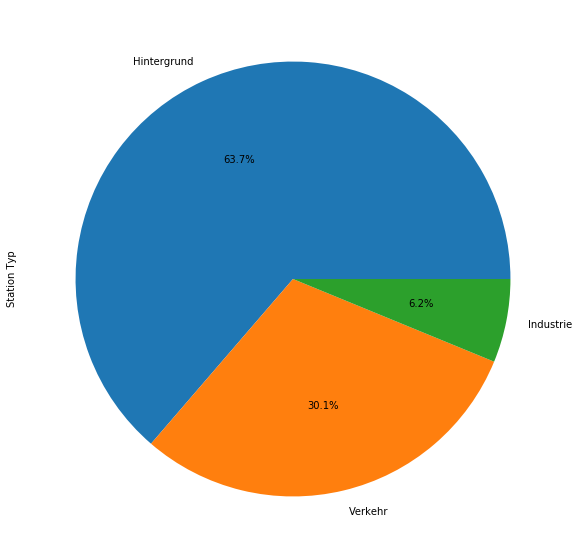

In [8]:
station_types = stations['Station Typ'].value_counts()  # Anzahl der Stationen pro Typ
station_types.plot.pie(figsize=(10,10), autopct='%1.1f%%')  # Kreisdiagramm zeichnen

d) Erstellen Sie mit folium eine interaktive Karte, auf der die einzelnen Messstationen als
Kreise eingezeichnet sind. Industrienahe Stationen sollen `gelb`, verkehrsnahe `rot` und die
Stationen mit Hintergrundbelastung `grün` eingezeichnet werden. Beim Klick auf die Kreise
sollen die Namen der Stationen angezeigt werden.

In [9]:
import folium
import folium.plugins

# Neues Mapping für Marker Farbe
station_types = stations['Station Typ'].dropna().unique()  # Vorhandene Station Typs filtern
colors = ['green', 'yellow', 'red']
type_color = dict(zip(station_types,colors))  # Dict das jedem Station Typ eine Farbe zuordnet

# Temporäres Dataframe für die Karte
map_stations = stations
map_stations['Color'] = map_stations['Station Typ'].map(type_color)  # Neue Spalte für die Farbe

# Karte anlegen
stations_map = folium.Map(location=[51.1642292, 10.4541194], zoom_start=6, control_scale=True)

# Marker für jede Station zur Karte hinzufügen
for i in range(len(map_stations)):
    folium.CircleMarker(
        map_stations[['Latitude of Station','Longitude of Station']].iloc[i], 
        popup=map_stations['Name'].iloc[i],
        color=map_stations['Color'].iloc[i],
        fill=True,
        fill_opacity=0.7,
        fill_color=map_stations['Color'].iloc[i]
    ).add_to(stations_map)

stations_map

e) Erzeugen Sie durch Filterung des DataFrames `stations` einen DataFrame `stations_BY`,
der die Informationen zu allen Messstationen in Bayern enthalt. 

In [10]:
stations_BY = stations.loc[stations['Network Code']=='BY']  # DataFrame filtern
stations_BY.head()

,Id,Code,Name,City,Synonym,Date of first activity,Date of last activity,Longitude of Station,Latitude of Station,Network Id,...,Station Type Id,Network Code,Network Name,Station Setting Name,Short name of station setting,Station Typ,Street of station,Street number of station,ZIP code of station,Color
435,435,DEBY001,Ansbach/Residenzstraße,Ansbach,,1989-07-01,None,10.5723,49.3049,2,...,3,BY,Bayern,städtisches Gebiet,städtisch,Verkehr,Residenzstraße/Brauhausstraße,,91522,red
436,436,DEBY002,Arzberg/Egerstraße,Arzberg,,1980-01-01,None,12.1887,50.0582,2,...,1,BY,Bayern,vorstädtisches Gebiet,vorstädtisch,Hintergrund,Egerstraße,17,95659,green
438,438,DEBY004,Kleinwallstadt/Hofstetter Straße,Kleinwallstadt,,1978-08-01,None,9.1715,49.8694,2,...,1,BY,Bayern,ländlich stadtnah,ländlich,Hintergrund,Hofstetter Straße,13,63839,green
439,439,DEBY005,Aschaffenburg/Bussardweg,Aschaffenburg,,1978-08-01,None,9.1180,49.9915,2,...,1,BY,Bayern,vorstädtisches Gebiet,vorstädtisch,Hintergrund,Bussardweg,ggüber 2,63741,green
440,440,DEBY006,Augsburg/Königsplatz,Augsburg,,1975-01-01,None,10.8950,48.3646,2,...,3,BY,Bayern,städtisches Gebiet,städtisch,Verkehr,Königsplatz,,86150,red


---

## Aufgabe 2 (NO<sub>2</sub>-Daten, Datenvorbereitung, Datenqualität) 
<a name="2"></a>

a) Laden Sie über die Measurements-API für alle bayerischen Stationen (wie oben ermittelt)
die Ein-Stunden-Mittelwerte fur die NO<sub>2</sub>-Konzentrationen für den Zeitraum 01.01.2016 bis
31.12.2019 herunter und uberführen Sie diese in einen DataFrame namens data_no2. Dieser soll die Spalten `STATION_ID`, `DT` und `NO2` besitzen, die die Stations-ID, das Messdatum mit Uhrzeit sowie die gemessene NO<sub>2</sub>-Konzentration enthalten.

In [11]:
# Holen von Messwerten für eine bestimmte Station
def fetch_measurements_for_station(station_Id, component, scope, date_from='2016-01-01', date_to='2019-12-31'):
    """ Returns station measurements as dictionary.
        Throws a KeyError excpetion when station doesn't have measurements for the given component. """
    # URL Parameter
    parameters = {
        'date_from': date_from,
        'time_from': '0',
        'date_to': date_to,
        'time_to': '24',
        'component': component,
        'scope': scope,
        'station': station_Id
    }
    url = 'https://www.umweltbundesamt.de/api/air_data/v2/measures/json'
    r = requests.get(url, params=parameters)  # Hole Daten für gegebene Parameter von der API
    response = r.json()
    return response['data'][station_Id]

# Holen von Messwerten NUR für bayerische Stationen
def get_measurements_BY_stations(component, scope, date_from='2016-01-01', date_to='2019-12-31'):
    """ Returns measurements for all bavarian stations """
    measurements = []
    for station_Id in stations_BY['Id']:
        try:
            result = fetch_measurements_for_station(station_Id, component, scope, date_from, date_to)
            for (key, value) in result.items():
                measurements.append([station_Id, key, value[2]]) # Id der Station, Zeitstempel, Messwert
        except KeyError:
            # Keine Daten vorhanden. Einzelner Messwert zum Startzeitpunkt mit Wert 0 wird angefügt.
            measurements.append([station_Id, date_from + ' ' + '00:00:00', 0])
    return measurements

In [12]:
data_no2 = pd.DataFrame(get_measurements_BY_stations('5', '2'), columns=['STATION_ID', 'DT', 'NO2'])
data_no2.head()

,STATION_ID,DT,NO2
0,435,2016-01-01 17:00:00,43.0
1,435,2016-01-01 18:00:00,27.0
2,435,2016-01-01 19:00:00,22.0
3,435,2016-01-01 20:00:00,14.0
4,435,2016-01-01 21:00:00,17.0


In [13]:
max_entires = data_no2['STATION_ID'].value_counts().max()  # Anzahl der Messzeitpunkte im Auswertezeitraum

b) Setzen Sie den dtype der Spalte NO2 auf `float` und wandeln Sie die Spalte DT in ein
`DateTime-Format` um.

In [14]:
data_no2['NO2'].astype(np.float64)  # Umwandlung in float
data_no2['DT'] = data_no2['DT'].astype('datetime64[ns]')  # Umwandlung in DateTime-Format

c) Entfernen Sie alle Zeilen, bei denen der Wert in der Spalte NO2 fehlt. Geben Sie an, wie
viele Zeilen dadurch entfernt wurden.

In [15]:
before = data_no2['NO2'].isnull().sum()
data_no2.dropna(subset=['NO2'], inplace=True)  # Zeilen die einen NA-Wert in Spalte NO2 haben aus DataFrame entfernen
after = data_no2['NO2'].isnull().sum()
print('Es wurden ' + str(before - after) + ' Zeilen entfernt.')

Es wurden 12309 Zeilen entfernt.


d) Entfernen Sie die Daten zu allen Stationen, die nicht für mindestens 95% der Messzeitpunkte im Auswertezeitraum einen gültigen Messwert enthalten.

In [16]:
min_entries = max_entires * 0.95  # Minimale Anzahl an Messzeitpunkten, die eine Satation haben muss

In [17]:
no2_entries = data_no2['STATION_ID'].value_counts()
# Index entspricht der zu entfernenden Station Id
to_remove = no2_entries[no2_entries <= min_entries].index
# Zeilen behalten, die sich nicht in to_remove befinden
data_no2 = data_no2[~data_no2['STATION_ID'].isin(to_remove)]

e) Für wie viele Stationen enthält der DataFrame data_no2 nun noch Daten?

In [18]:
print("Es sind noch Daten zu " + str(data_no2['STATION_ID'].nunique()) + " Stationen vorhanden.")

Es sind noch Daten zu 45 Stationen vorhanden.


f) Zu welchen der bayerischen Stationen enthält er keine Daten (mehr)? Geben Sie deren IDs und Namen aus.

In [19]:
stations_BY.loc[to_remove, ['Id', 'Name']]  # Nach Stationen filtern die nicht mehr vorhanden sind

,Id,Name
513,513,Bad Reichenhall/Kirchholzstraße
511,511,Würzburg/Kopfklinik
436,436,Arzberg/Egerstraße
496,496,Regen/Bodenmaiser Straße
460,460,Vohburg a.d. Donau/Alter Wöhrer Weg
481,481,Naila/Selbitzer Berg
527,527,Sulzbach-Rosenberg/Lohe


---

## Aufgabe 3 (Explorative Datenanalyse) 
<a name="3"></a>

a) Welches ist der in den Jahren 2016-2019 höchste gemessene Ein-Stunden-Mittelwert für NO<sub>2</sub>? Wann und an welcher Station wurde er gemessen?

In [20]:
largest = data_no2.nlargest(1,'NO2')
largest  # Höchster gemessener Ein-Stunden-Mittelwert

,STATION_ID,DT,NO2
1231202,535,2017-06-22 16:00:00,270.0


In [21]:
stations_BY[stations_BY['Id']==largest.iloc[0]['STATION_ID']][['Name']]  # Name der Station

,Name
535,München/Landshuter Allee


Am 22. Juni 2017 um 16:00 Uhr ist der höchste Ein-Stunden-Mittelwert (270,00 μg/m<sup>3</sup>) für NO<sub>2</sub> in der Landshuter Allee (München) gemessen worden.

b) An welchem Tag im Auswertezeitraum war die durchschnittliche NO<sub>2</sub>-Konzentration über
alle bayerischen Stationen am höchsten und welchen Wert hatte sie?

In [22]:
data_no2['NO2'].groupby(data_no2['DT'].dt.date).agg([('Mittelwert','mean')]).nlargest(1,'Mittelwert')

,Mittelwert
DT,
2017-01-23,75.724074


Am 23.01.2017 wurde die höchste durchschnittliche NO<sub>2</sub>-Konzentration mit $\approx$ 75,72 μg/m<sup>3</sup> in Bayern gemessen.

c) Ermitteln Sie die 10 höchsten Messwerte und die zugehörigen Messzeitpunkte für die Station in der Nikolaistraße in Weiden.

In [23]:
# Id der Nikolaistraße aus DataFrame stations_BY erhalten
nikolaistr = stations_BY[stations_BY['Name'].str.contains(r'Nikolaistraße')].iloc[0]['Id']
# Alle Messdaten zur Nikolaistraße finden, absteigend sortieren und die höchsten zehn davon ausgeben
data_no2.loc[data_no2['STATION_ID']==nikolaistr, ['DT','NO2']].sort_values(by='NO2', ascending=False).head(10)

,DT,NO2
920946,2017-01-23 17:00:00,103.0
920900,2017-01-21 19:00:00,102.0
920947,2017-01-23 18:00:00,100.0
936114,2018-10-17 17:00:00,100.0
920948,2017-01-23 19:00:00,98.0
920899,2017-01-21 18:00:00,97.0
920949,2017-01-23 20:00:00,97.0
921524,2017-02-16 19:00:00,97.0
939307,2019-02-27 18:00:00,96.0
921523,2017-02-16 18:00:00,96.0


d) Berechnen Sie die Mittelwerte der gemessenen NO<sub>2</sub>-Konzentrationen über die einzelnen Jahre. Wie haben sich diese zeitlich entwickelt? Unterscheiden Sie dabei auch nach dem Stations-Typ.

In [24]:
# Zusammenführen von stations_BY und data_no2, um den jeweiligen Stations-Typ ermitteln zu können
merged_df = pd.merge(left=stations_BY, right=data_no2, left_on='Id', right_on='STATION_ID')
# Nach Jahr gruppieren und Mittelwert je Stations-Typ aggregieren
merged_df.groupby([data_no2['DT'].dt.year, 'Station Typ']).agg([('Mittelwert','mean')])

NO2
                   Mittelwert
DT     Station Typ           
2016.0 Hintergrund  20.241606
       Verkehr      37.923640
2017.0 Hintergrund  19.204725
       Verkehr      36.519726
2018.0 Hintergrund  18.817080
       Verkehr      34.544232
2019.0 Hintergrund  17.926816
       Verkehr      32.374484

Die Mittelwerte der gemessenen NO<sub>2</sub>-Konzentrationen haben sich bei allen Station Typen im Messzeitraum reduziert. Zudem ist die Reduktion der Mittelwerte des Station Typs `Verkehr`, im Vergleich zu `Hintergrund`, signifikanter.

---

## Aufgabe 4 (Verletzung der zulässigen NO<sub>2</sub>-Grenzwerte) 
<a name="4"></a>

a) Ermitteln Sie, an welchen bayerischen Stationen jeweils in den Jahren 2016-2019 Überschreitungen des Stundengrenzwerts (d.h. der Ein-Stunden-Mittelwert überschreitet 200 µg/m<sup>3</sup>) gemessen wurden, und geben Sie an wie viele Überschreitungen es jeweils waren. Dieser darf innerhalb eines Jahres höchstens 18-Mal pro Station überschritten werden. Welche Stationen haben dieses Kriterium verletzt?

In [25]:
data_no2[data_no2['NO2'] > 200].groupby([data_no2['DT'].dt.year, 'STATION_ID']).count()[['NO2']]

NO2
DT   STATION_ID     
2016 473           1
     530           1
     535          13
     539           1
2017 530           1
     535          12
2018 535           1
2019 535           1

Keine Station hat das Kriterium verletzt. Die höchste Anzahl an Überschreitungen war 2016 bei Station 535 (aus Aufgabe 3a: Landshuter Allee (München)) mit 13 Überschreitungen der Stundengrenzwerte für NO<sub>2</sub>.

b) Ermitteln Sie, an welchen bayerischen Stationen und in welchen Jahren der Jahresmittelwert
der Ein-Stunden-Mittelwerte die Grenze von 40µg/m<sup>3</sup> überschritten hat und geben Sie die zugehörigen Jahresmittelwerte an. 

In [26]:
no2_avg = data_no2.groupby([data_no2['DT'].dt.year, 'STATION_ID']).agg([('Jahresmittelwert','mean')])
no2_avg[no2_avg['NO2']['Jahresmittelwert'] > 40]

NO2
                Jahresmittelwert
DT   STATION_ID                 
2016 471               56.352267
     497               41.725060
     530               45.992115
     535               79.940981
     539               41.881459
     540               46.283186
2017 471               53.337065
     497               41.483579
     530               44.028604
     535               78.085584
     540               42.590732
2018 471               47.547575
     530               43.056357
     535               66.196090
     540               46.410048
2019 471               42.172516
     535               62.741190

Die Zahl der Überschreitungen nimmt im Auswertezeitraum jährlich ab.

---

## Aufgabe 5 (Visualisierung) 
<a name="5"></a>

a) Erstellen Sie ein Histogramm über alle gemessenen NO<sub>2</sub>-Konzentrationen im Auswertungszeitraum 2016-2019.

Text(0, 0.5, 'Häufigkeit')

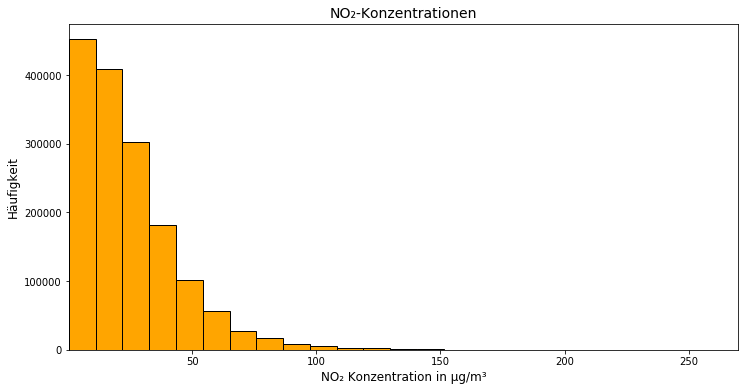

In [27]:
plt.figure(figsize=(12,6))
plt.hist(x=data_no2['NO2'], bins=25, edgecolor='k', color='orange')
plt.margins(x=0)
plt.title('NO\u2082-Konzentrationen', fontsize=14)
plt.xlabel('NO\u2082 Konzentration in µg/m\u00B3', fontsize=12)
plt.ylabel('Häufigkeit', fontsize=12)

b) Stellen Sie den jahreszeitlichen Verlauf der gemessenen NO<sub>2</sub>-Konzentrationen in einem
geeigneten Diagramm dar. Was ist zu beobachten und wie kann dies erklärt werden?

In [28]:
# Zuerst nach Jahr und Monat gruppieren, dann summieren und DataFrame umformen
y_m = data_no2.groupby([(data_no2['DT'].dt.year),(data_no2['DT'].dt.month)]).sum().unstack()

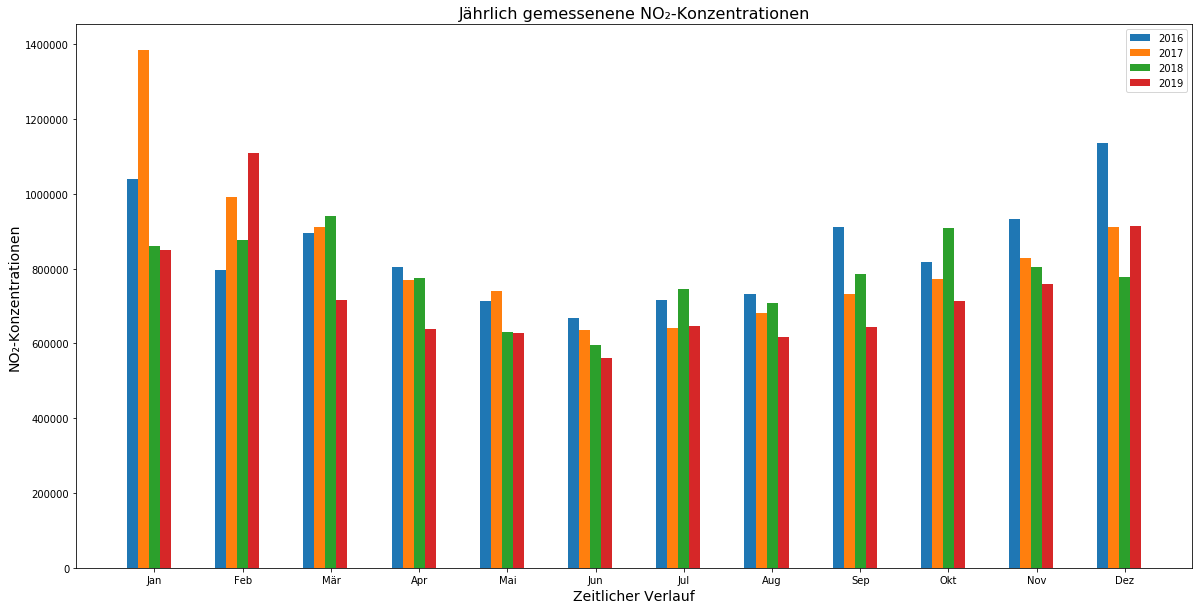

In [29]:
months = ['Jan','Feb','Mär','Apr','Mai','Jun','Jul','Aug','Sep','Okt','Nov','Dez']
# Festgelegte x-Werte für Aufteilung der Monate auf x-Achse
x = np.array([2,4,6,8,10,12,14,16,18,20,22,24])

# y-Werte der jeweiligen Jahre
y1 = y_m.loc[2016,:]
y2 = y_m.loc[2017,:]
y3 = y_m.loc[2018,:]
y4 = y_m.loc[2019,:]

# Column-Chart zeichnen
plt.figure(figsize=(20,10))
plt.title('Jährlich gemessenene NO\u2082-Konzentrationen', fontsize=16)

plt.bar(x-0.5, y1, width=0.25, label='2016')
plt.bar(x-0.25, y2, width=0.25, label='2017')
plt.bar(x-0.0, y3, width=0.25, label='2018')
plt.bar(x+0.25, y4, width=0.25, label='2019')

plt.xticks(x, months)  # Beschriftung der x-Achsen Werte
plt.xlabel('Zeitlicher Verlauf', fontsize=14)
plt.ylabel('NO\u2082-Konzentrationen', fontsize=14)
plt.legend()

c) Visualisieren Sie in einem geeigneten Diagramm den Zeitverlauf der Tagesmittel der gemessenen NO<sub>2</sub>-Konzentrationen im Beobachtungszeitraum. Lassen sich Trends erkennen?

Text(0, 0.5, 'Tagesmittel in µg/m³')

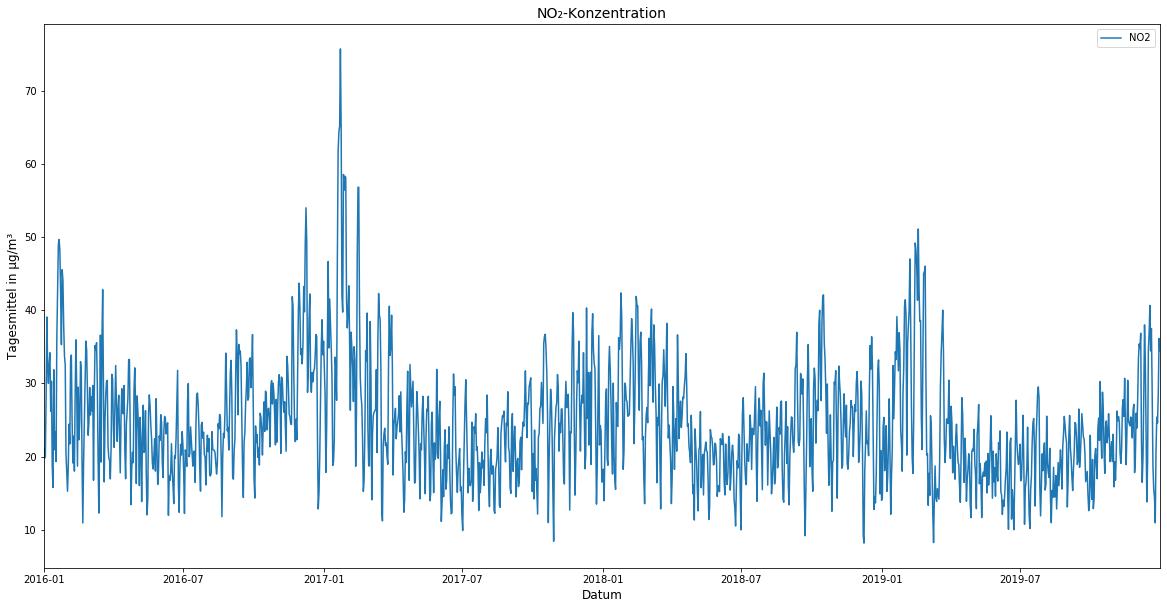

In [30]:
# Nach Datum gruppieren, Mittelwert des Tages berechnen und Liniendiagramm zeichnen
data_no2.groupby(data_no2['DT'].dt.date).mean().plot.line(figsize=(20,10))
plt.margins(x=0)  # Keine weißen Ränder
plt.title('NO\u2082-Konzentration', fontsize=14)
plt.xlabel('Datum', fontsize=12)
plt.ylabel('Tagesmittel in µg/m\u00B3', fontsize=12)

Es lassen sich folgende Trends erkennen:
1. In den Sommermonaten ist das Tagesmittel nur halb so viel im Vergleich zu den Wintermonaten.
2. Zum Jahresbeginn (Januar, Februar) ist die NO<sub>2</sub>-Konzentration am Höchsten.
3. Die Maximalkonzentrationen, zu Beginn des Jahres, sind seit Januar 2017 gesunken.

---

## Aufgabe 6 (Interaktives Diagramm) 
<a name="6"></a>

a) Erzeugen Sie ein interaktives Säulendiagramm in Plotly, in welchem die Mittelwerte der NO2-Konzentrationen im Tagesverlauf über die (vollen) Stunden aufgetragen werden. Verwenden Sie als Datengrundlage die Messwerte der bayerischen Stationen aus dem DataFrame data_no2. Das Diagramm soll zwei Radio-Buttons enthalten. Über den ersten Radio-Button kann der Stations-Typ gefiltert werden (Auswahlmöglichkeiten all, background und traffic), über den zweiten Radio-Button kann der Wochentag eingeschränkt werden (Auswahlmöglichkeiten All, Monday, ..., Sunday).

In [31]:
import plotly.graph_objs as go
import ipywidgets as widgets

In [32]:
# Daten für "Alle - Alle"-Kombinaten
hourly_mean = data_no2.groupby(data_no2['DT'].dt.hour).agg([('mittel','mean')])

In [33]:
# Zur Umbenennung - mittels rename() - eines numerischen Wertes in den jeweiligen Wochentag
weekday_index = {0.0:'Montag', 1.0:'Dienstag', 2.0:'Mittwoch', 3.0:'Donnerstag', 4.0:'Freitag', 5.0:'Samstag', 6.0:'Sonntag'}

In [34]:
# Daten für "Wochentag - Alle"-Kombinaten
daily_mean = data_no2.groupby([(data_no2['DT'].dt.weekday),(data_no2['DT'].dt.hour)]).agg([('mittel','mean')])
daily_mean.rename(index=weekday_index, level=0, inplace=True)

In [35]:
# Daten in Kombination mit Station Typ
weekly_type = merged_df.groupby([(merged_df['Station Typ']),(merged_df['DT'].dt.hour)]).agg([('mittel','mean')])

In [36]:
# Daten in Kombination mit Station Typ und Wochentag
weekday_type = merged_df.groupby([(merged_df['Station Typ']),(merged_df['DT'].dt.weekday),(merged_df['DT'].dt.hour)]).mean().unstack()
weekday_type.rename(index=weekday_index, level=-1, inplace=True)

In [37]:
# Radio Buttons für Station Typ
radio_station_type = widgets.RadioButtons(
    options=['Alle', 'Hintergrund', 'Verkehr'],
    description='Stations-Typ',
    value = 'Alle',
    disable=False
)

# Radio Buttons für Wochentage
radio_weekday = widgets.RadioButtons(
    options=['Alle', 'Montag', 'Dienstag', 'Mittwoch', 'Donnerstag', 'Freitag', 'Samstag', 'Sonntag'],
    description='Wochentag',
    value = 'Alle',
    disable=False
)

In [38]:
# Layout für interaktives Bar-Chart-Diagramm
layout = go.Layout(
    title=dict(text='Mittelwerte der NO\u2082-Konzentrationen'),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
          text='Tagesverlauf',
          font=dict(size=18, color='#7f7f7f')
        )
    )
)

In [39]:
# Daten für interaktives Bar-Chart-Diagramm
trace = go.Bar(x=hourly_mean.index, y=hourly_mean['NO2']['mittel'])

In [40]:
# Anmerkung: 'Beliebig' bedeutet jeder Radio-Button Wert, außer 'Alle'

# Radio-Button für Wochentag wurde betätigt
def update_weekly_chart(change):
    # x-Werte für Bar Chart
    bar = chart.data[0]  
    # Aktuelle Werte der beiden Radio-Button
    station_type = radio_station_type.value
    weekday = radio_weekday.value
    # Neue y-Werte basierend auf Radio-Button-Werte ermitteln
    if weekday == 'Alle':
        if station_type == 'Alle':
            # Station-Typ: Alle, Wochentag: Alle
            bar.y = hourly_mean['NO2']['mittel']
        else:
            # Station-Typ: Beliebig, Wochentag: Alle
            bar.y = weekly_type.loc[station_type, 'NO2']['mittel']
    if weekday != 'Alle':
        if station_type == 'Alle':
            # Station-Typ: Alle, Wochentag: Beliebig
            bar.y = daily_mean.loc[weekday, 'NO2']['mittel']
        else:
            # Station-Typ: Beliebig, Wochentag: Beliebig
            bar.y = weekday_type.loc[(station_type, weekday), 'NO2']

# Radio-Button für Station Typ wurde betätigt
def update_type_chart(change):
    # x-Werte für Bar Chart
    bar = chart.data[0]  
    # Aktuelle Werte der beiden Radio-Button
    station_type = radio_station_type.value
    weekday = radio_weekday.value
    # Neue y-Werte basierend auf Radio-Button-Werte ermitteln
    if station_type == 'Hintergrund':
        if weekday == 'Alle':
            # Station-Typ: Hintergrund, Wochentag: Alle
            bar.y = weekly_type.loc['Hintergrund', 'NO2']['mittel']
        else:
            # Station-Typ: Hintergrund, Wochentag: Beliebig
            bar.y = weekday_type.loc[('Hintergrund', weekday), 'NO2']
    elif radio_station_type.value == 'Verkehr':
        if radio_weekday.value == 'Alle':
            # Station-Typ: Verkehr, Wochentag: Alle
            bar.y = weekly_type.loc['Verkehr', 'NO2']['mittel']
        else:
            # Station-Typ: Verkehr, Wochentag: Beliebig
            bar.y = weekday_type.loc[('Verkehr', weekday), 'NO2']
    else:
        if weekday != 'Alle':
            # Station-Typ: Alle, Wochentag: Beliebig
            bar.y = daily_mean.loc[weekday, 'NO2']['mittel'] 
        else:
            # Station-Typ: Alle, Wochentag: Alle
            bar.y = hourly_mean['NO2']['mittel']  

# Observe-Funktionen werden aufgerufen, sobald sich ein Radio-Button Wert ändert
radio_station_type.observe(update_type_chart, names="value")
radio_weekday.observe(update_weekly_chart, names="value")

In [41]:
chart = go.FigureWidget(data=[trace], layout=layout)
radio_buttons = widgets.HBox([radio_station_type, radio_weekday])  # Anordnung der Radio-Buttons

widgets.VBox([chart, radio_buttons]) # Radio Buttons unterhalb des Charts anordnen

    'data': [{'type': 'bar',
              'uid': '51b5dcf3-92ea-4599-b03a-d9532…

b) Analysieren Sie anhand des erstellten Diagramms den tageszeitlichen Verlauf der NO<sub>2</sub>-Konzentration in Abhängigkeit des Stations-Typs und des Wochentags. Beschreiben und interpretieren Sie die beobachteten Zusammenhänge. 

Stations Typ `Hintergrund`:
 * NO<sub>2</sub> Kenzentration nimmt tagsüber stärker ab als bei `Verkehr`.
 * Die tageszeitlichen Verläufe sind während der Woche (Montag - Freitag) als auch am Wochendende (Samstag und Sonntag) jeweils annährend gleich.

Stations Typ `Verkehr`:
 * Es gibt stärkere Abweichungen im tageszeitlichen Verlauf.

Die höchsten NO<sub>2</sub> Konzentrationen werden im Zeitraum von `6-8` und `17-21` Uhr gemessen.
Grund dafür ist der zu diesen Zeiten stattfindende Arbeitsverkehr.

---

## Aufgabe 7 (Abhängigkeit zwischen der Ozonkonzentration und der Temperatur) 
<a name="7"></a>

a) Laden Sie sich die Wetterdaten aus der Datei `wetterdaten.csv` in einen DataFrame namens `df_weather`. Dieser enthält historische Wetterdaten für die Oberpfalz für die Jahre 2016-2019. Für unsere Analyse ist die Spalte `temperatureMax` relevant, die die Tageshöchsttemperaturen in Grad Fahrenheit beinhaltet.

In [42]:
df_weather = pd.read_csv('wetterdaten.csv', encoding='utf8')
df_weather['temperatureMax']

0       34.30
1       33.07
2       32.26
3       34.04
4       37.36
        ...  
1456    40.38
1457    35.71
1458    32.38
1459    35.56
1460    38.03
Name: temperatureMax, Length: 1461, dtype: float64

b) Wandeln Sie die Temperaturwerte in Grad Celsius um.

$y = \frac{(x − 32)}{1,8}$

In [43]:
df_weather['temperatureMax'] = df_weather.apply(lambda row: (row['temperatureMax']-32)/1.8 , axis=1)
df_weather['temperatureMax']

0       1.277778
1       0.594444
2       0.144444
3       1.133333
4       2.977778
          ...   
1456    4.655556
1457    2.061111
1458    0.211111
1459    1.977778
1460    3.350000
Name: temperatureMax, Length: 1461, dtype: float64

c) Laden Sie über die Measurements-API für die Station in der Nikolaistraße in Weiden die Ein-Stunden-Mittelwerte fur die Ozon-Konzentrationen für den Zeitraum 01.01.2016 bis 31.12.2019 herunter und überführen Sie diese in einen DataFrame namens `data_o3`. Dieser soll die Spalten `DT` und `O3` besitzen, die das Messdatum mit Uhrzeit (Beginn der Stunde, über die gemittelt wird) und die gemessene O3-Konzentration enthalten.

In [44]:
nikolaistr_o3_data = fetch_measurements_for_station(nikolaistr, '3', '2')  # O3 Daten für Nikolaistraße

In [45]:
# Erhaltene Datensätze in ein Dictonary konvertieren.
i = 0
o3_dict = {}
for (key, val) in nikolaistr_o3_data.items():
    o3_dict[i] = [key, val[2]]  # Zahl: Datum, O3-Wert 
    i+=1

In [46]:
# Dictonary in Datafram konvertieren
data_o3 = pd.DataFrame.from_dict(o3_dict, orient='index', columns=['DT','O3'])
data_o3

,DT,O3
0,2016-01-01 17:00:00,33.0
1,2016-01-01 18:00:00,29.0
2,2016-01-01 19:00:00,25.0
3,2016-01-01 20:00:00,34.0
4,2016-01-01 21:00:00,32.0
...,...,...
35042,2019-12-31 19:00:00,0.5
35043,2019-12-31 20:00:00,0.5
35044,2019-12-31 21:00:00,0.5
35045,2019-12-31 22:00:00,0.5


d) Aggregieren Sie die Messwerte, indem Sie die O<sub>3</sub>-Maximalkonzentrationen pro Tag ermitteln und diese in einen DataFrame namens `o3_data_max` speichern.

In [47]:
data_o3['DT'] = data_o3['DT'].astype('datetime64[ns]')  # Spalte 'DT' in datetime-Format konvertieren
# Nach Datum gruppieren und Maximalwert aggregieren
o3_data_max = data_o3['O3'].groupby(data_o3['DT'].dt.date).agg([('Maximalwert','max')])

e) Stellen Sie den zeitlichen Verlauf der aggregierten Tageswerte für die Jahre 2016-2019 grafisch dar und beschreiben Sie die beobachteten Trends.

Text(0, 0.5, 'Menge in µg/m³')

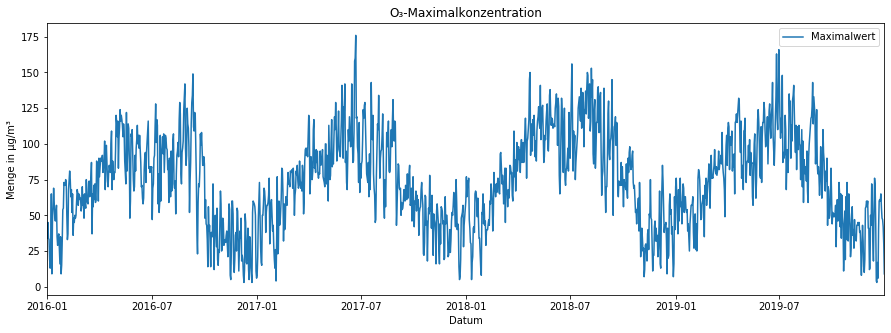

In [48]:
# Linienplot zeichnen
ax = o3_data_max.plot.line(figsize=(15,5))
ax.margins(x=0)
ax.set_title('O\u2083-Maximalkonzentration')
ax.set_xlabel('Datum')
ax.set_ylabel('Menge in \u00b5g/m\u00b3')

Die O<sub>3</sub>-Maximalkonzentrationen zeigen einen zyklischen Trend. Von Januar bis Juli steigen die Werte und von August bis Dezember fallen sie.

f) Erstellen Sie ein Streudiagramm, in dem die Maximalkonzentration (y-Achse) und die Maximaltemperatur (x-Achse) der einzelnen Tage für die Jahre 2016-2019 gegeneinander auftragen sind. Beschreiben und erklären Sie den beobachteten Zusammenhang.

Text(0, 0.5, 'O₃ Maximalkonzentration in µg/m³')

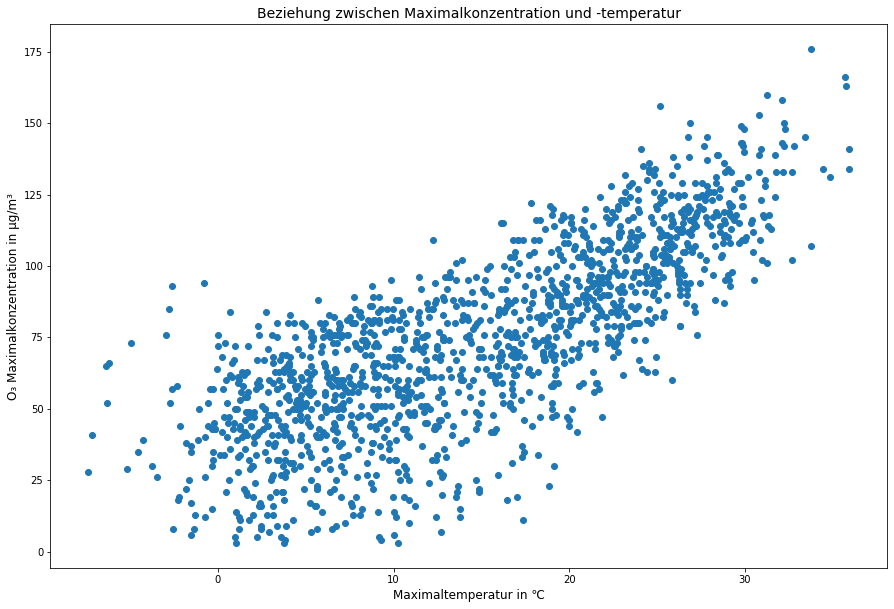

In [49]:
# Scatterplot zeichnen
plt.figure(figsize=(15,10))
plt.scatter(x=df_weather['temperatureMax'], y=o3_data_max['Maximalwert'], )
plt.title('Beziehung zwischen Maximalkonzentration und -temperatur', fontsize=14)
plt.xlabel('Maximaltemperatur in \u2103', fontsize=12)
plt.ylabel('O\u2083 Maximalkonzentration in \u00b5g/m\u00b3', fontsize=12)

g) Ermitteln Sie anhand der Tageswerte den empirischen Korrelationskoeffizienten zwischen
der Maximalkonzentration und der Maximaltemperatur.

In [50]:
np.corrcoef(o3_data_max['Maximalwert'], df_weather['temperatureMax'])[0][1]

0.774623762790585

Maximalkonzentration und Maximaltemperatur sind stark positiv linear korreliert.

h) Erstellen Sie ein lineares Modell zur Modellierung der Beziehung zwischen den beiden Größen. Erzeugen Sie das Streudiagramm erneut und zeichnen Sie die berechnete Gerade mit ein.

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
# Lineares Modell anpassen
lr = LinearRegression().fit(o3_data_max['Maximalwert'].values.reshape(-1,1), df_weather['temperatureMax'])

Text(0, 0.5, 'Maximaltemperatur in ℃')

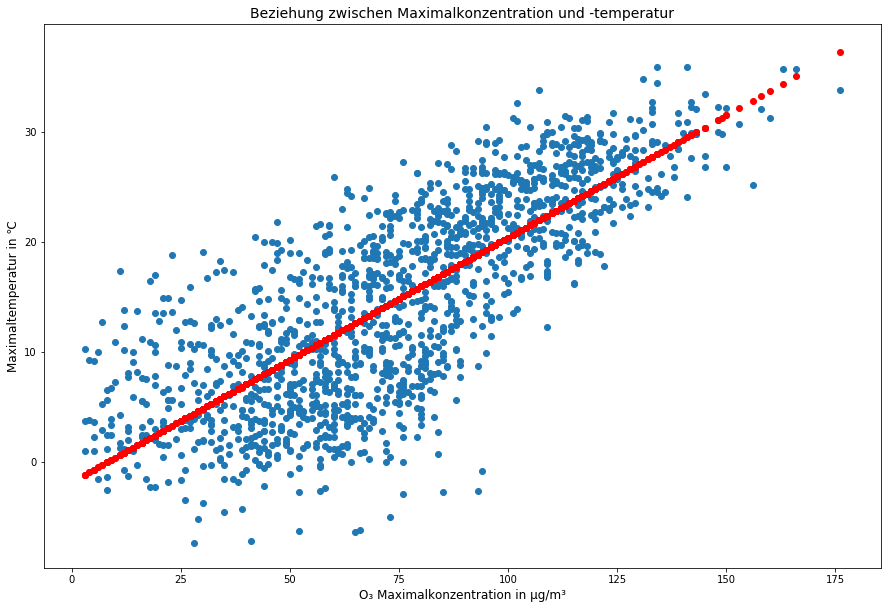

In [53]:
plt.figure(figsize=(15,10))
# Scatter-Plots zeichnen
plt.scatter(x=o3_data_max['Maximalwert'],y=df_weather['temperatureMax'])
plt.scatter(x=o3_data_max['Maximalwert'],y=lr.predict(o3_data_max['Maximalwert'].values.reshape(-1,1)), color='r')

plt.title('Beziehung zwischen Maximalkonzentration und -temperatur', fontsize=14)
plt.xlabel('O\u2083 Maximalkonzentration in \u00b5g/m\u00b3', fontsize=12)
plt.ylabel('Maximaltemperatur in \u2103', fontsize=12)

---

## Aufgabe 8 (Einfluss der Coronavirus-Pandemie auf die Luftqualität) 
<a name="8"></a>

Untersuchen Sie anhand geeigneter Analysen den Einfluss des Lockdowns im Zusammenhang mit der Coronavirus-Pandemie auf die Luftqualität in Bayern. Stellen Sie Hypothesen auf und überprüfen Sie diese, indem Sie geeignete Luft-Messdaten akquirieren und auswerten. Stellen Sie Ihre Ergebnisse textuell und visuell dar.

### Hypothese 1: Die Luftqualität hat sich während des Lockdowns verbessert.

In [54]:
# Daten von API abfragen
no2_2019 = get_measurements_BY_stations('5', '2', '2019-01-01', '2019-06-30')
data2019_no2 = pd.DataFrame(no2_2019, columns=['STATION_ID', 'DT', 'NO2'])

no2_2020 = get_measurements_BY_stations('5', '2', '2020-01-01', '2020-06-30')
data2020_no2 = pd.DataFrame(no2_2020, columns=['STATION_ID', 'DT', 'NO2'])

In [55]:
# Spaltenwerte konvertieren
data2019_no2['NO2'].astype(np.float64)
data2019_no2['DT'] = data2019_no2['DT'].astype('datetime64[ns]')

data2020_no2['NO2'].astype(np.float64)
data2020_no2['DT'] = data2020_no2['DT'].astype('datetime64[ns]')

In [56]:
# Jährliche NO2-Werte
y_no2_2019 = data2019_no2['NO2'].groupby([(data2019_no2['DT'].dt.year),(data2019_no2['DT'].dt.month)]).sum().unstack()
y_no2_2020 = data2020_no2['NO2'].groupby([(data2020_no2['DT'].dt.year),(data2020_no2['DT'].dt.month)]).sum().unstack()

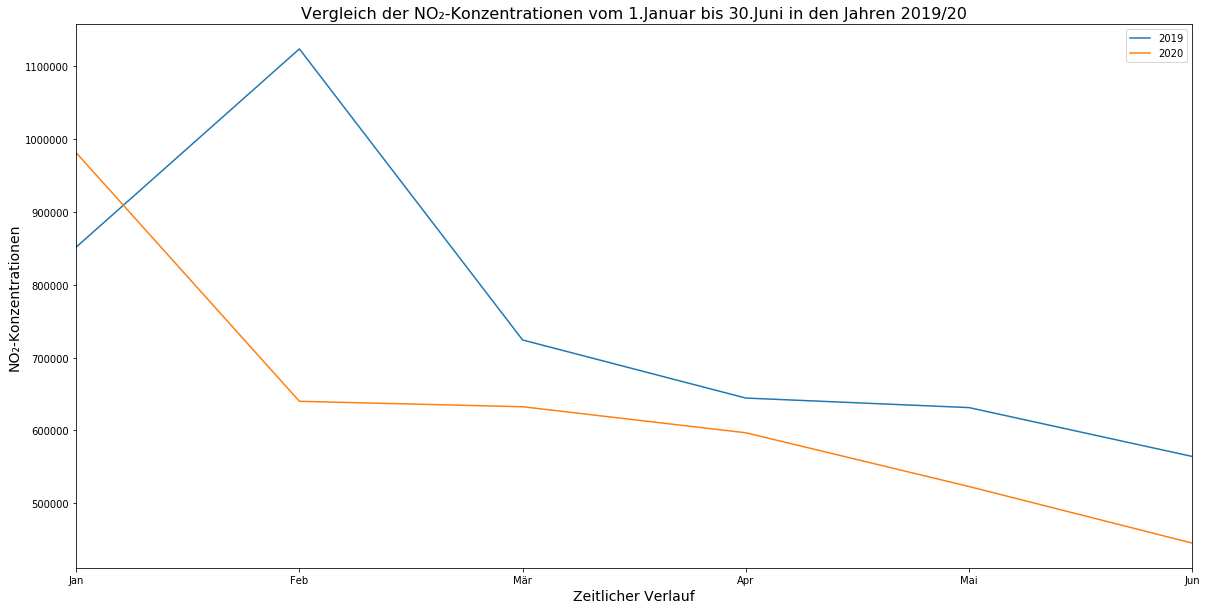

In [57]:
months = ['Jan','Feb','Mär','Apr','Mai','Jun']
x = np.array([2,4,6,8,10,12])
y1 = y_no2_2019.loc[2019,:]
y2 = y_no2_2020.loc[2020,:]

# Linien - Plot zeichnen
plt.figure(figsize=(20,10))
plt.title('Vergleich der NO\u2082-Konzentrationen vom 1.Januar bis 30.Juni in den Jahren 2019/20', fontsize=16)

plt.plot(x, y1, label='2019')
plt.plot(x, y2, label='2020')

plt.margins(x=0)
plt.xticks(x, months)
plt.xlabel('Zeitlicher Verlauf', fontsize=14)
plt.ylabel('NO\u2082-Konzentrationen', fontsize=14)
plt.legend()

Typtischer Verlauf der NO<sub>2</sub>-Konzentration. Wie schon bei der 5b) gesehen, verringert sich die NO<sub>2</sub>-Konzentration von einem erst sehr hohem Wert, am Anfang des Jahres, um dann zum Ende des Jahres wieder zu steigen. Dieses typische Verhalten hat sich durch die Pandemie nicht bemerkenswert verändert. Nur leicht niederigere Konzentration sind während des beobachteten Zeitraumes zu erkennen.

#### Auswertung der Feinstaub-Veränderung

In [58]:
# Daten von API abfragen und in jeweiliges Dataframe speichern
pm10_2019 = get_measurements_BY_stations('1', '1', '2019-03-01', '2019-06-30')
pm10_BY_2019 = pd.DataFrame(pm10_2019, columns=['STATION_ID', 'DT', 'PM10'])

pm10_2020 = get_measurements_BY_stations('1', '1', '2020-03-01', '2020-06-30')
pm10_BY_2020 = pd.DataFrame(pm10_2020, columns=['STATION_ID', 'DT', 'PM10'])

In [59]:
# 0-Werte durch NaN Werte ersetzen und anschlißend löschen
pm10_BY_2019 = pm10_BY_2019.replace(0.0, np.nan)
pm10_BY_2019.dropna(subset=['PM10'], inplace=True)

pm10_BY_2020 = pm10_BY_2020.replace(0.0, np.nan)
pm10_BY_2020.dropna(subset=['PM10'], inplace=True)

In [60]:
# Zusammenführen von stations_BY und jeweiligen PM10-Dataframe
stations_pm10_2019 = pd.merge(left=stations_BY, right=pm10_BY_2019, left_on='Id', right_on='STATION_ID')
stations_pm10_2020 = pd.merge(left=stations_BY, right=pm10_BY_2020, left_on='Id', right_on='STATION_ID')

In [61]:
from folium.plugins import HeatMap

# Karte für 2019 und 2020 erstellen
pm10_map = folium.plugins.DualMap(
    location=[48.790447, 11.497889], 
    tiles='cartodbpositron', 
    zoom_start=7, 
    zoom_control=False
)

# Heatmaps generieren
HeatMap(stations_pm10_2019[['Latitude of Station', 'Longitude of Station', 'PM10']]).add_to(pm10_map.m1)
HeatMap(stations_pm10_2020[['Latitude of Station', 'Longitude of Station', 'PM10']]).add_to(pm10_map.m2)

pm10_map

Es lässt sich eine Verlagerung, sowie eine Erhöhung der PM<sub>10</sub>-Konzentrationen im Vergleich zum Vorjahr erkennen.

#### Auswertung der Luftqualität zu Beginn der Ausgangsbeschränkung

In [62]:
# Daten für März 2020 von API abfragen und in Dataframe speichern
march_2020 = get_measurements_BY_stations('5', '2', '2020-03-01', '2020-03-31')
no2_march_2020 = pd.DataFrame(march_2020, columns=['STATION_ID', 'DT', 'NO2'])

In [63]:
# Spaltenwerte konvertieren
no2_march_2020['NO2'].astype(np.float64)
no2_march_2020['DT'] = no2_march_2020['DT'].astype('datetime64[ns]')

In [64]:
# Mittelwerte ermitteln
march_2020_mean = no2_march_2020.groupby([(no2_march_2020['DT'].dt.day),(no2_march_2020['DT'].dt.hour)]).mean()
march_2020_mean['Hour'] = march_2020_mean.index.get_level_values(level=1) 
march_2020_mean['Day'] = march_2020_mean.index.get_level_values(level=0) 

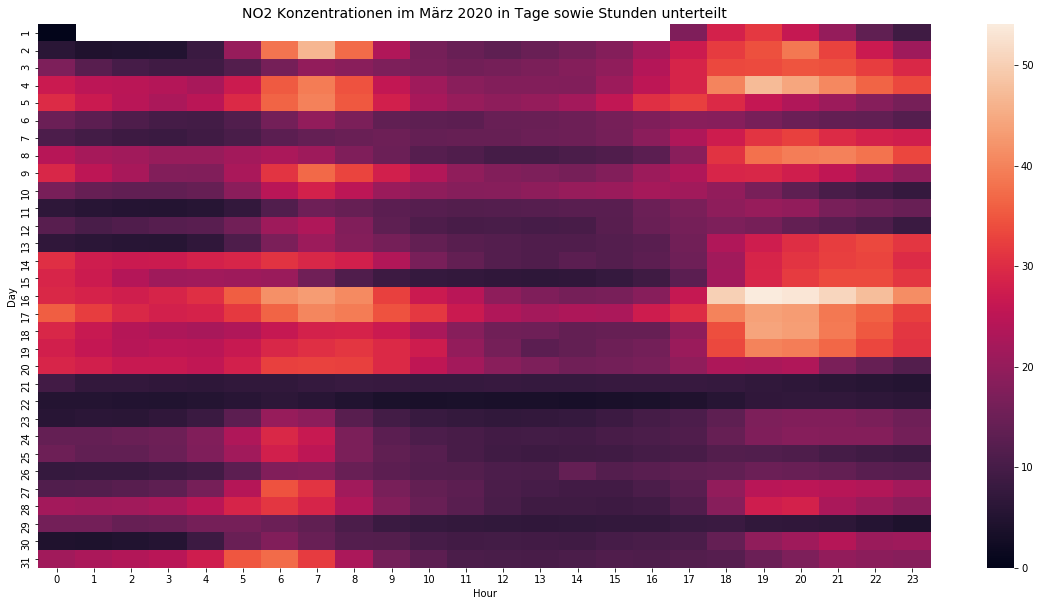

In [65]:
import seaborn as sns;

month = march_2020_mean.pivot("Day", "Hour", "NO2")  # Werte für Heatmap
plt.subplots(figsize=(20,10))
plt.title('NO2 Konzentrationen im März 2020 in Tage sowie Stunden unterteilt', fontsize=14)
sns.heatmap(month)  # Heatmap zeichnen

Genauere Untersuchung des 20.3.2020 (Beginn der Ausgangsbeschränkung in Bayern) ergibt, dass diese keinerlei merkbaren Einfluss auf die NO<sub>2</sub> Konzentrationen nach dem 20.3.2020 hatte. 
Am 21. sowie 22. März fallen niedrigere Werte auf, allerdings sind diese höchstwahrscheinlich dem Wochenende zuzuschreiben.

### Fazit zu Hypothese 1

Man kann leichte Veränderungen zum Vorjahr feststellen. Bei den PM<sub>10</sub>-Werten ist eine Verlagerung der Konzentrationen, an manchen Stellen Bayerns, ersichtlich. Die NO<sub>2</sub>-Werte deuten auf eine leichte Verbesserung hin. In einer weiterführenden Hypothese muss daher ermittelt werden, ob diese Veränderungen einen tatsächlichen Zusammenhang mit der Coronavirus-Pandemie haben.

### Hypothese 2: Die Coronavirus-Pandemie hat keine Auswirkungen auf die Verbesserung der Luftqualität.

#### Vergleich der NO2-Konzentrationen von verkehrsnahen Stationen

In [66]:
# Zusammenführen von stations_BY und den NO2 Daten für 2019
merged_df_2019 = pd.merge(left=stations_BY, right=data2019_no2, left_on='Id', right_on='STATION_ID')
y_verkehr_2019 = merged_df_2019.groupby([(data2019_no2['DT'].dt.month), 'Station Typ']).sum().unstack()

In [67]:
# Zusammenführen von stations_BY und den NO2 Daten für 2020
merged_df_2020 = pd.merge(left=stations_BY, right=data2020_no2, left_on='Id', right_on='STATION_ID')
y_verkehr_2020 = merged_df_2020.groupby([(data2020_no2['DT'].dt.month), 'Station Typ']).sum().unstack()

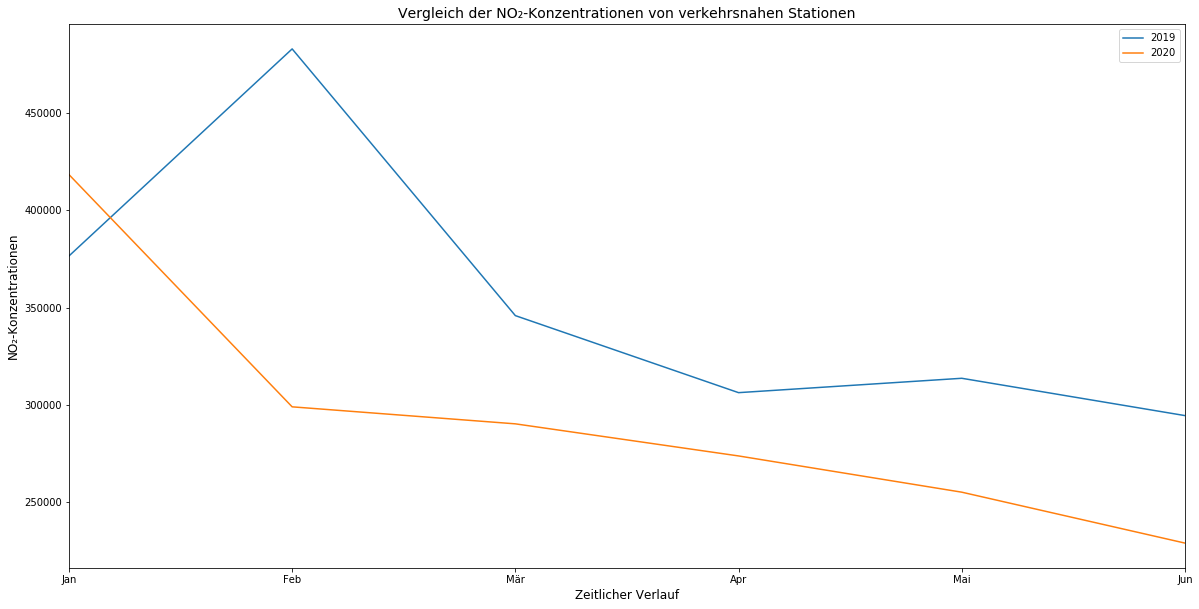

In [68]:
months = ['Jan','Feb','Mär','Apr','Mai','Jun']
x = np.array([2,4,6,8,10,12])

# Werte von verkehrsnahen Stationen
y1 = y_verkehr_2019['NO2']['Verkehr']
y2 = y_verkehr_2020['NO2']['Verkehr']

# Linienplot zeichnen
plt.figure(figsize=(20,10))
plt.title('Vergleich der NO\u2082-Konzentrationen von verkehrsnahen Stationen', fontsize=14)

plt.plot(x, y1, label='2019')
plt.plot(x, y2, label='2020')

plt.margins(x=0)
plt.xticks(x, months)
plt.xlabel('Zeitlicher Verlauf', fontsize=12)
plt.ylabel('NO\u2082-Konzentrationen', fontsize=12)
plt.legend()

Die Auswertung der Messdaten von verkehrsnahen Stationen im Vergleich zu 2019 zeigt ein deutliche Reduktion der NO<sub>2</sub>-Konzentrationen. Allerdings befinden sich die auffälligsten Veränderungen außerhalb der Zeit während der Ausgangsbeschränkung.  

#### Vergleich der Ozon Messwerte

In [69]:
# Daten von API abfragen und in jeweiliges Dataframe speichern
Ozon_2019 = get_measurements_BY_stations('3', '2', '2019-01-01', '2019-06-30')
data_Ozon_2019 = pd.DataFrame(Ozon_2019, columns=['STATION_ID', 'DT', 'O3'])

Ozon_2020 = get_measurements_BY_stations('3', '2', '2020-01-01', '2020-06-30')
data_Ozon_2020 = pd.DataFrame(Ozon_2020, columns=['STATION_ID', 'DT', 'O3'])

In [70]:
# Konvertierung der Werte 
data_Ozon_2019['O3'].astype(np.float64)
data_Ozon_2019['DT'] = data_Ozon_2019['DT'].astype('datetime64[ns]')

data_Ozon_2020['O3'].astype(np.float64)
data_Ozon_2020['DT'] = data_Ozon_2020['DT'].astype('datetime64[ns]')

In [71]:
# Nach Tagesmittelwerten aggregieren
Ozon_2019 = data_Ozon_2019['O3'].groupby(data_Ozon_2019['DT'].dt.date).agg([('Mittelwert','mean')])
Ozon_2020 = data_Ozon_2020['O3'].groupby(data_Ozon_2020['DT'].dt.date).agg([('Mittelwert','mean')])

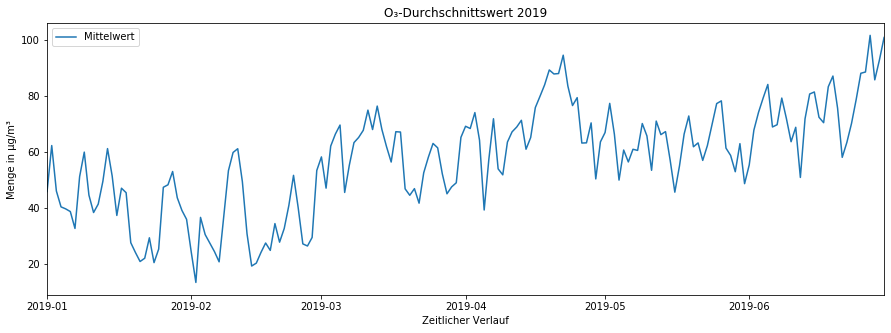

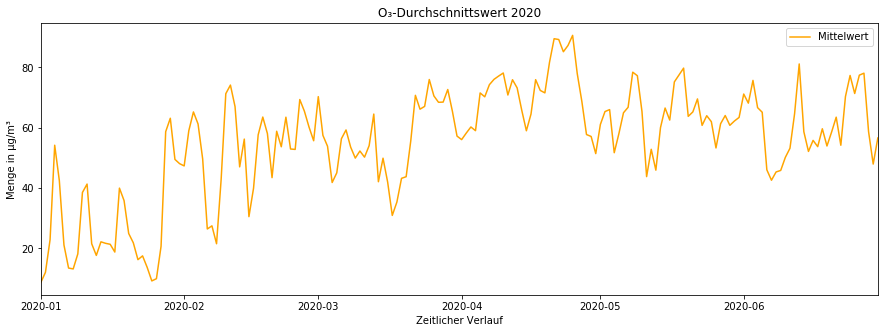

In [72]:
# Plot zeichnen
o3_2019_plot = Ozon_2019.plot.line(figsize=(15,5))
o3_2020_plot = Ozon_2020.plot.line(figsize=(15,5), color='orange')

o3_2019_plot.set_xlabel('Zeitlicher Verlauf')
o3_2019_plot.set_ylabel('Menge in \u00b5g/m\u00b3')
o3_2019_plot.set_title('O\u2083-Durchschnittswert 2019')
o3_2019_plot.margins(x=0)

o3_2020_plot.set_xlabel('Zeitlicher Verlauf')
o3_2020_plot.set_ylabel('Menge in \u00b5g/m\u00b3')
o3_2020_plot.set_title('O\u2083-Durchschnittswert 2020')
o3_2020_plot.margins(x=0)

Man kann erkennen, dass die durchschnittlichen O<sub>3</sub>-Werte in 2020 leicht höher sind als in 2019.

#### Fazit zu Hypothese 2

Die O<sub>3</sub>- als auch die NO<sub>2</sub>-Werte, sind die wichtigsten Messdaten in Verbindung mit dem Verkehrsaufkommen (bodennah als auch in der Luft). Beide Auswertungen lassen nicht darauf schließen, dass eine Verbesserung der Luftqaulität direkt mit der Coronavirus-Pandemie in Verbindung gebracht werden kann.

Außerdem ist der Karte von (https://www.dlr.de/content/de/artikel/news/2020/02/20200505_corona-effekt-auf-luftqualitaet-eindeutig.html) zu entnehmen, dass:
* Dieses Jahr sorgte Polarluft in weiten Teilen Europas sowie eine andauernde Westwindlage, bei der sich die Schadstoffe nicht anreichern konnten, bereits für ungewöhnlich saubere Luft.
* Im Ruhrgebiet lässt sich vergleichsweise eine deutliche Verbesserung der Luftqualität erkennen.

### Schlussfolgerung

Die dargestellten Ergebnisse rechtfertigen die Aussagen, dass ...
* ein reduziertes Verkehrsaufkommen, aufgrund der Ausgangsbeschränkung, nur geringe Auswirkungen auf die Luftqualität zeigt.
* die Auswirkungen anderer Einflüsse (z. B. meteorologische Einflüsse) auf die Luftqualität nicht außer Acht gelassen werden sollten.
* der Standort bei der Beurteilung, ob sich die Luftqulität verändert hat, eine entscheidende Rolle spielt.

$\Rightarrow$ Die Coronavirus-Pandemie zeigt keine direkte Auswirkung auf die Luftqualität in Bayern.